## CTA Increase In Police Officers Hires Analysis

Combining all the data we have collected, we noticed that as crimes increased, the number of police officers hired by CTA increased and also the Chicago Police Department is the highest paid department in the CTA.

**Team Members: Heer Patel** 

Data was collected from the following sources:
* https://www.transitchicago.com/cta-renews-agreement-with-cpd-for-additional-police-resources/
* https://www.cbsnews.com/chicago/news/its-reassuring-to-see-plans-underway-to-pay-cpd-officers-extra-to-combat-crime-on-cta-trains/
* https://news.wttw.com/2023/08/23/chicago-police-department-staffing-steady-during-johnson-s-first-100-days-data?utm_source=chatgpt.com



/var/folders/d_/w7784pkx6f3d73_9x3jz_y100000gn/T/ipykernel_61243/1846301532.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_total_earnings.index, y=dept_total_earnings.values, palette="coolwarm")


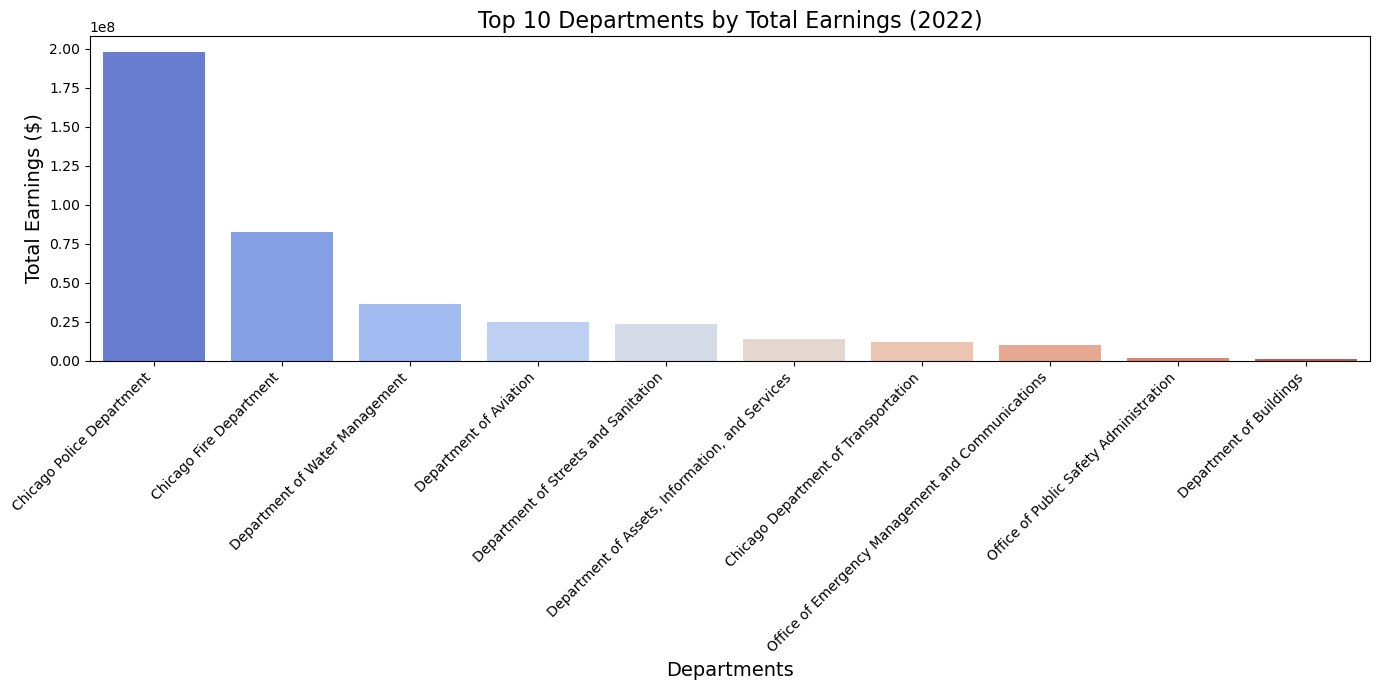

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file
df_overtime = pd.read_csv('data/Employee_Overtime_and_Supplemental_Earnings_2022.csv')

# Group by Department: sum the total earnings
dept_total_earnings = df_overtime.groupby('DEPARTMENT NAME')['TOTAL'].sum()

# Sort and select top 10
dept_total_earnings = dept_total_earnings.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(14, 7))
sns.barplot(x=dept_total_earnings.index, y=dept_total_earnings.values, palette="coolwarm")
plt.title('Top 10 Departments by Total Earnings (2022)', fontsize=16)
plt.ylabel('Total Earnings ($)', fontsize=14)
plt.xlabel('Departments', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


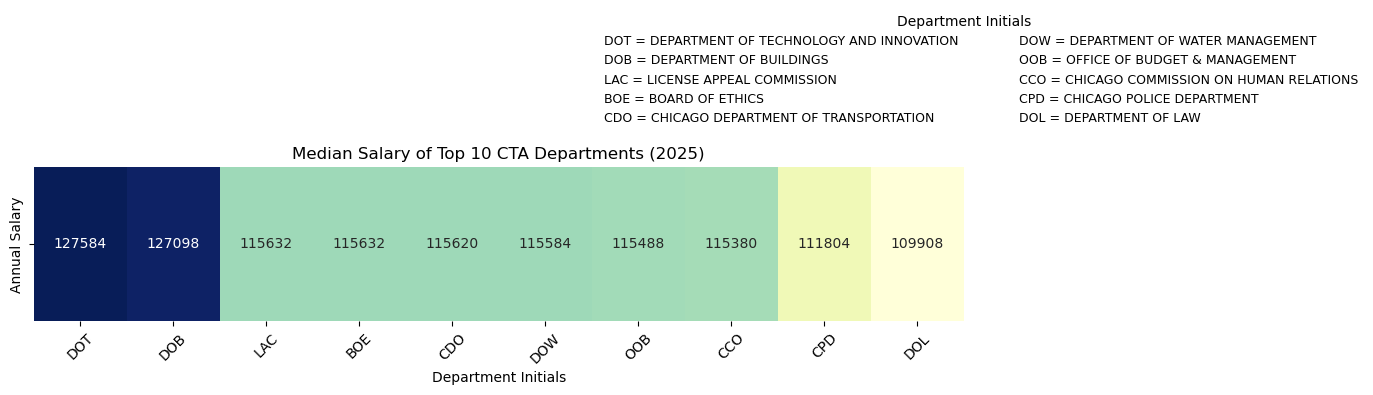

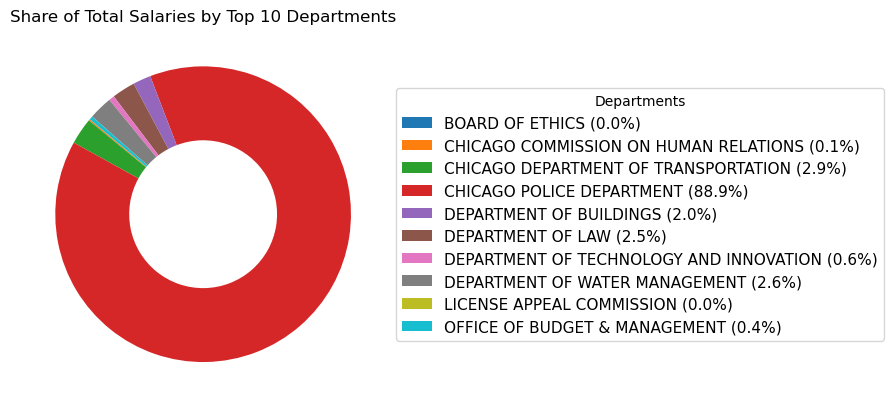

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Load, clean, & group the data
df_employees = pd.read_csv("data/CTA_Data/CTA_Employees_2025.csv")
df_filtered = df_employees[(df_employees['Full or Part-Time'] == 'F') & (df_employees['Salary or Hourly'] == 'SALARY')].copy()
df_filtered[['Name', 'Job Titles', 'Department', 'Annual Salary']].head()

# 1. Heatmap of median salary across departments (pivoted for heatmap display)
dept_salary_stats = df_filtered.groupby('Department')['Annual Salary'].median().sort_values(ascending=False)
top_depts_heatmap = dept_salary_stats.head(10)
initials_map = {
    name: ''.join(word[0] for word in name.split()[:3]).upper()  # up to 3 initials
    for name in top_depts_heatmap.index
}
heatmap_df = pd.DataFrame(top_depts_heatmap.rename(index=initials_map)).T

plt.figure(figsize=(12, 2))
sns.heatmap(heatmap_df, cmap="YlGnBu", annot=True, fmt=".0f", cbar=False)
plt.title('Median Salary of Top 10 CTA Departments (2025)')
plt.xlabel('Department Initials')
plt.xticks(rotation=45)

legend_labels = [f"{initials_map[dept]} = {dept}" for dept in top_depts_heatmap.index]
legend_handles = [mpatches.Patch(color='none', label=label) for label in legend_labels]

plt.legend(
    handles=legend_handles,
    title="Department Initials",
    loc='lower center',
    bbox_to_anchor=(1, 1.2),
    ncol=2,
    fontsize=9,
    frameon=False
)
plt.show()

# 3. Pie chart of salary share by top departments
top_salary_depts = df_filtered[df_filtered['Department'].isin(top_depts_heatmap.index)]
salary_by_dept = top_salary_depts.groupby('Department')['Annual Salary'].sum()
salary_by_dept = salary_by_dept[salary_by_dept > 0]


wedges, texts = plt.pie(
    salary_by_dept,
    labels=None,
    startangle=140,
    wedgeprops={'width': 0.5}
)
total = salary_by_dept.sum()
legend_labels = [
    f"{dept} ({val / total:.1%})"
    for dept, val in salary_by_dept.items()
]
plt.legend(
    wedges,
    legend_labels,
    title="Departments",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)
plt.title('Share of Total Salaries by Top 10 Departments')
plt.show()


/var/folders/d_/w7784pkx6f3d73_9x3jz_y100000gn/T/ipykernel_61243/4071079658.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dept_quarters['TOTAL'] = dept_quarters.sum(axis=1)


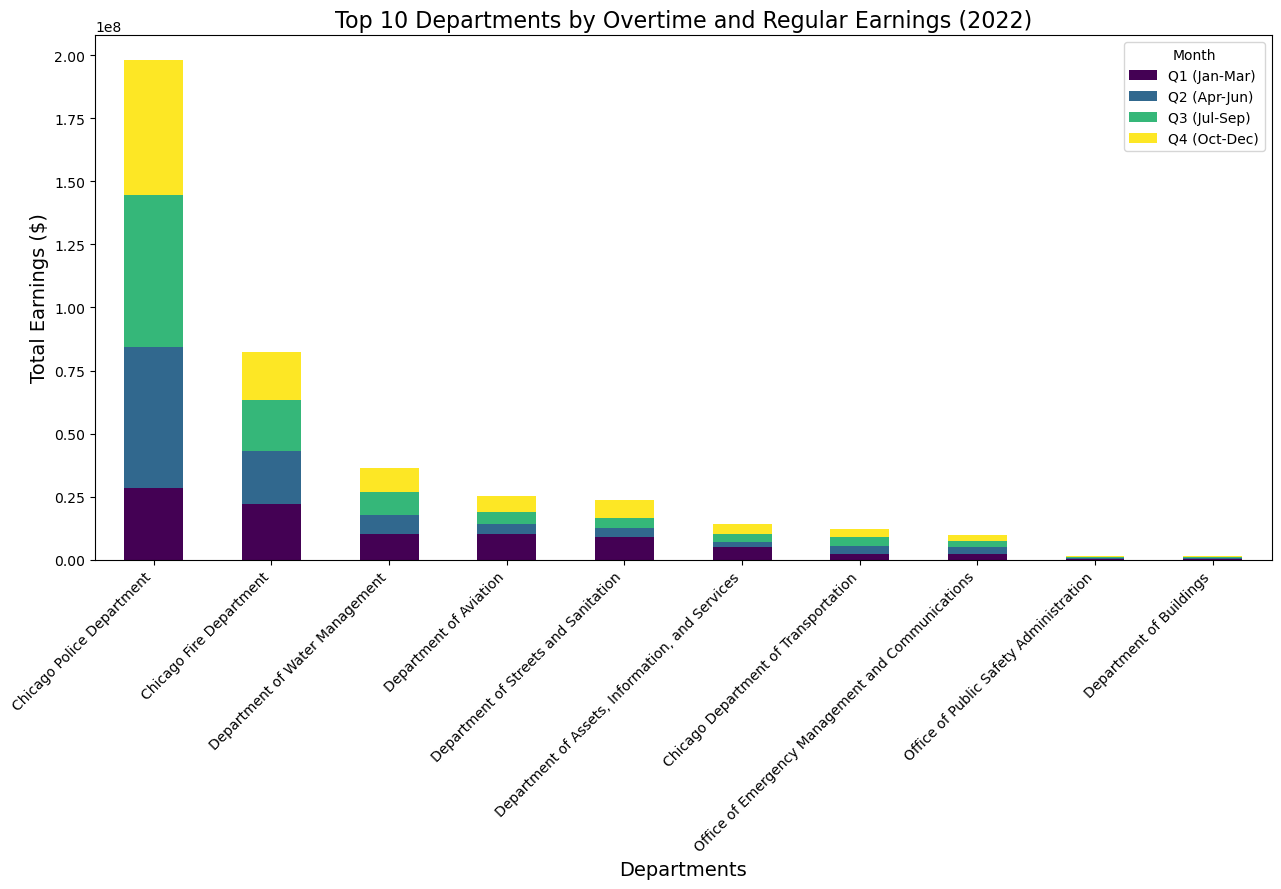

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_overtime = pd.read_csv('data/Employee_Overtime_and_Supplemental_Earnings_2022.csv')
monthly_cols = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE',
                'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']
dept_earnings = df_overtime.groupby('DEPARTMENT NAME')[monthly_cols].sum()

dept_earnings['Q1 (Jan-Mar)'] = dept_earnings[['JANUARY', 'FEBRUARY', 'MARCH']].sum(axis=1)
dept_earnings['Q2 (Apr-Jun)'] = dept_earnings[['APRIL', 'MAY', 'JUNE']].sum(axis=1)
dept_earnings['Q3 (Jul-Sep)'] = dept_earnings[['JULY', 'AUGUST', 'SEPTEMBER']].sum(axis=1)
dept_earnings['Q4 (Oct-Dec)'] = dept_earnings[['OCTOBER', 'NOVEMBER', 'DECEMBER']].sum(axis=1)

# Now we only keep the quarters
dept_quarters = dept_earnings[['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']]


dept_quarters['TOTAL'] = dept_quarters.sum(axis=1)
dept_quarters = dept_quarters.sort_values(by='TOTAL', ascending=False).head(10)
dept_quarters = dept_quarters.drop(columns=['TOTAL'])

dept_quarters.plot(kind='bar', stacked=True, figsize=(13,9), colormap='viridis')
plt.title('Top 10 Departments by Overtime and Regular Earnings (2022)', fontsize=16)
plt.ylabel('Total Earnings ($)', fontsize=14)
plt.xlabel('Departments', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Month")
plt.tight_layout()
plt.show()
